In [1]:
import pickle
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
all_pca = pd.read_csv("C:\\Users\\HP\\Desktop\\all_pca.csv")
all_pca

,num,Date,因子
0,0,2008-07-09 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
1,1,2008-07-10 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
2,2,2008-07-11 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
3,3,2008-07-12 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
4,4,2008-07-13 00:00:00,[-4.517539 -1.0637348 -0.22452042 -0.640718...
...,...,...,...
4342,4342,2020-05-29 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4343,4343,2020-05-30 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4344,4344,2020-05-31 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4345,4345,2020-06-01 00:00:00,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...


In [3]:
print((all_pca["Date"][1][0:10]))

2008-07-10


In [4]:
# 調整 PCA 格式
del all_pca["num"]
for i in range(len(all_pca)):
    all_pca["Date"][i] = all_pca["Date"][i][0:10]
all_pca

,Date,因子
0,2008-07-09,[-4.517539 -1.0637348 -0.22452042 -0.640718...
1,2008-07-10,[-4.517539 -1.0637348 -0.22452042 -0.640718...
2,2008-07-11,[-4.517539 -1.0637348 -0.22452042 -0.640718...
3,2008-07-12,[-4.517539 -1.0637348 -0.22452042 -0.640718...
4,2008-07-13,[-4.517539 -1.0637348 -0.22452042 -0.640718...
...,...,...
4342,2020-05-29,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4343,2020-05-30,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4344,2020-05-31,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4345,2020-06-01,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...


In [5]:
all_pca.Date = all_pca.Date.astype(str)
all_pca.Date

0       2008-07-09
1       2008-07-10
2       2008-07-11
3       2008-07-12
4       2008-07-13
           ...    
4342    2020-05-29
4343    2020-05-30
4344    2020-05-31
4345    2020-06-01
4346    2020-06-02
Name: Date, Length: 4347, dtype: object

In [6]:
# 合併名稱要相同
df_raw = pd.read_excel("C:\\Users\\HP\\Desktop\\野村全球高股息\\野村全球品牌基金.xlsx", )
df_raw = df_raw.rename(columns={'年月日': 'Date'})

# 格式也要相同
def to_date(df):
    df["Date"] = datetime.datetime.strptime(str(df["Date"])[0:10], "%Y/%m/%d")
    return df
df_raw = df_raw.apply(to_date, axis=1)
df_raw

,Date,幣別,淨值(元)
0,2020-06-08,NTD,31.84
1,2020-06-05,NTD,31.69
2,2020-06-04,NTD,31.12
3,2020-06-03,NTD,31.29
4,2020-06-02,NTD,30.85
...,...,...,...
2775,2009-02-06,NTD,7.73
2776,2009-02-05,NTD,7.39
2777,2009-02-04,NTD,7.36
2778,2009-02-03,NTD,7.23


In [7]:
df_raw.Date = df_raw.Date.astype(str)
df_raw.Date

0       2020-06-08
1       2020-06-05
2       2020-06-04
3       2020-06-03
4       2020-06-02
           ...    
2775    2009-02-06
2776    2009-02-05
2777    2009-02-04
2778    2009-02-03
2779    2009-02-02
Name: Date, Length: 2780, dtype: object

In [8]:
all_df = pd.merge(df_raw, all_pca, on='Date')
all_df

,Date,幣別,淨值(元),因子
0,2020-06-02,NTD,30.85,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
1,2020-06-01,NTD,30.49,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
2,2020-05-29,NTD,30.27,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
3,2020-05-28,NTD,30.14,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
4,2020-05-27,NTD,29.93,[-4.6986413 -1.4476448 -4.7126555 20.986408 ...
...,...,...,...,...
2771,2009-02-06,NTD,7.73,[-4.5175557 -1.0637038 -0.22452757 -0.640680...
2772,2009-02-05,NTD,7.39,[-4.5175557 -1.0637038 -0.22452757 -0.640680...
2773,2009-02-04,NTD,7.36,[-4.5175557 -1.0637038 -0.22452757 -0.640680...
2774,2009-02-03,NTD,7.23,[-4.5175557 -1.0637038 -0.22452757 -0.640680...


In [9]:
# 把 PCA Factor 拆成五項
for i in range(5):
    all_df["x" + str(i+1)] = 0.0
for i in range(len(all_df)):
    temp = all_df["因子"][i].replace("[", "").replace("]", "").split()
    # print(temp)
    for j in range(5):
        all_df["x" + str(j+1)][i] = float(temp[j])
df_rate = all_df.copy()
del df_rate["因子"]
df_rate

<ipython-input-9-c95cf49e80a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["x" + str(j+1)][i] = float(temp[j])


,Date,幣別,淨值(元),x1,x2,x3,x4,x5
0,2020-06-02,NTD,30.85,-4.698641,-1.447645,-4.712656,20.986408,5.384891
1,2020-06-01,NTD,30.49,-4.698641,-1.447645,-4.712656,20.986408,5.384891
2,2020-05-29,NTD,30.27,-4.698641,-1.447645,-4.712656,20.986408,5.384891
3,2020-05-28,NTD,30.14,-4.698641,-1.447645,-4.712656,20.986408,5.384891
4,2020-05-27,NTD,29.93,-4.698641,-1.447645,-4.712656,20.986408,5.384891
...,...,...,...,...,...,...,...,...
2771,2009-02-06,NTD,7.73,-4.517556,-1.063704,-0.224528,-0.640680,0.096782
2772,2009-02-05,NTD,7.39,-4.517556,-1.063704,-0.224528,-0.640680,0.096782
2773,2009-02-04,NTD,7.36,-4.517556,-1.063704,-0.224528,-0.640680,0.096782
2774,2009-02-03,NTD,7.23,-4.517556,-1.063704,-0.224528,-0.640680,0.096782


In [10]:
df_rate["10day_growth"] = 0
df_rate["1day_growth"] = 0
df_rate['BuyOrNot'] = 0
df_rate

,Date,幣別,淨值(元),x1,x2,x3,x4,x5,10day_growth,1day_growth,BuyOrNot
0,2020-06-02,NTD,30.85,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
1,2020-06-01,NTD,30.49,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
2,2020-05-29,NTD,30.27,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
3,2020-05-28,NTD,30.14,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
4,2020-05-27,NTD,29.93,-4.698641,-1.447645,-4.712656,20.986408,5.384891,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2771,2009-02-06,NTD,7.73,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0
2772,2009-02-05,NTD,7.39,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0
2773,2009-02-04,NTD,7.36,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0
2774,2009-02-03,NTD,7.23,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0,0,0


In [11]:
# 低檔投資法是與10天前比較
df_rate["10day_growth"] = (df_rate["淨值(元)"] - df_rate.shift(10)["淨值(元)"])/df_rate.shift(10)["淨值(元)"]
df_rate["1day_growth"] = (df_rate["淨值(元)"] - df_rate.shift(1)["淨值(元)"])/df_rate.shift(1)["淨值(元)"]
df_rate = df_rate[10:len(all_df)]  # 刪除平移10天導致的Na
df_rate = df_rate.reset_index()
del df_rate["index"]
df_rate

,Date,幣別,淨值(元),x1,x2,x3,x4,x5,10day_growth,1day_growth,BuyOrNot
0,2020-05-18,NTD,29.17,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.054457,0.000343,0
1,2020-05-15,NTD,28.44,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.067235,-0.025026,0
2,2020-05-14,NTD,28.16,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.069706,-0.009845,0
3,2020-05-13,NTD,28.06,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.069011,-0.003551,0
4,2020-05-12,NTD,28.28,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.055129,0.007840,0
...,...,...,...,...,...,...,...,...,...,...,...
2761,2009-02-06,NTD,7.73,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0.064738,-0.008974,0
2762,2009-02-05,NTD,7.39,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0.000000,-0.043984,0
2763,2009-02-04,NTD,7.36,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0.001361,-0.004060,0
2764,2009-02-03,NTD,7.23,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,-0.025606,-0.017663,0


In [12]:
# 標記漲跌跟交易訊號
df_rate['10day_label'] = 0 # 先透過這種方式新增好欄位做準備，下面執行效能會好很多
for i in range(len(df_rate)):
    if df_rate["10day_growth"][i] <= -0.1:
        for j in range(10):
            df_rate.loc[i+j, '10day_label'] = 1

df_rate['1day_label'] = 0 # 先透過這種方式新增好欄位做準備，下面執行效能會好很多
def label2(row, down = -0.1):
    if pd.notnull(row['1day_label']):
        row['1day_label'] = 1 if row['1day_growth'] <= down else 0
    return row

 # 記得: 1.要把新的df指派給原本的df才會成功更新。 2. axis要設定為1，才會以row為單位跑回圈
df_rate = df_rate.apply(label2, axis=1)

df_rate['BuyOrNot'] = 0
for i in range(len(df_rate)):
    if df_rate['10day_label'][i] == 1 or df_rate['1day_label'][i] == 1:
        df_rate.loc[i, 'BuyOrNot'] = 1
df_rate = df_rate.copy()
df_rate

,Date,幣別,淨值(元),x1,x2,x3,x4,x5,10day_growth,1day_growth,BuyOrNot,10day_label,1day_label
0,2020-05-18,NTD,29.17,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.054457,0.000343,0,0,0
1,2020-05-15,NTD,28.44,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.067235,-0.025026,0,0,0
2,2020-05-14,NTD,28.16,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.069706,-0.009845,0,0,0
3,2020-05-13,NTD,28.06,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.069011,-0.003551,0,0,0
4,2020-05-12,NTD,28.28,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.055129,0.007840,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,2009-02-06,NTD,7.73,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0.064738,-0.008974,0,0,0
2762,2009-02-05,NTD,7.39,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0.000000,-0.043984,0,0,0
2763,2009-02-04,NTD,7.36,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,0.001361,-0.004060,0,0,0
2764,2009-02-03,NTD,7.23,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,-0.025606,-0.017663,0,0,0


In [13]:
print("跌設定為10%的情況下")
buy_times = len(df_rate[df_rate['10day_label'] == 0])
print("沒跌：" + str(buy_times))

buy_times = len(df_rate[df_rate['10day_label'] == 1])
print("跌：" + str(buy_times))
# df_rate[df_rate["10天後跌"] == 1]

跌設定為10%的情況下
沒跌：2678
跌：88


In [14]:
print("跌設定為1%的情況下")
buy_times = len(df_rate[df_rate['1day_label'] == 0])
print("沒跌：" + str(buy_times))

buy_times = len(df_rate[df_rate['1day_label'] == 1])
print("跌：" + str(buy_times))
# df_rate[df_rate["1天後跌"] == 1]

跌設定為1%的情況下
沒跌：2766
跌：0


In [15]:
# 刪除重複項
# DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
# ["x1", "x2", "x3", "x4", "x5", "BuyOrNot"]
df_rate = df_rate.sort_values(by=["x1", "x2", "x3", "x4", "x5", "BuyOrNot"])
df_rate = df_rate.drop_duplicates(subset=["x1", "x2", "x3", "x4", "x5", "BuyOrNot"])

df_rate = df_rate[0:len(df_rate)-1]
df_rate = df_rate.sort_values(by=[])
df_rate

,Date,幣別,淨值(元),x1,x2,x3,x4,x5,10day_growth,1day_growth,BuyOrNot,10day_label,1day_label
1926,2012-06-08,NTD,15.91,-5.524594,-1.502702,-1.847283,-1.343040,-9.693687,0.010801,0.001259,0,0,0
1866,2012-09-03,NTD,16.90,-5.469798,-1.167040,-3.248143,-0.803000,-1.535938,-0.015152,0.008353,0,0,0
1120,2015-09-11,NTD,20.07,-5.349284,-0.661868,-0.401376,-0.694817,-0.054839,-0.002981,0.004002,0,0,0
1574,2013-11-07,NTD,21.51,-5.321343,-1.833867,-1.566770,-1.050184,-1.270663,-0.011943,0.005610,0,0,0
1989,2012-03-09,NTD,17.51,-5.317914,-0.680485,-0.728858,-0.858592,-0.309481,-0.014077,-0.009055,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,2013-07-22,NTD,20.09,-3.392201,0.381956,-0.995269,0.304738,-0.090841,-0.036913,-0.000498,0,0,0
1231,2015-04-02,NTD,21.59,-3.386836,0.014124,-0.175802,0.506539,1.396519,0.004653,-0.004610,0,0,0
1281,2015-01-13,NTD,20.94,-3.313064,-0.364671,0.347531,-0.117672,0.596118,-0.001431,0.012083,0,0,0
1473,2014-04-10,NTD,22.63,-2.496644,-0.369611,-0.356301,0.291034,-0.341680,-0.009628,0.012528,0,0,0


In [16]:
print("BuyOrnot = 1")
buy_times = len(df_rate[df_rate["BuyOrNot"] == 1])
print(str(buy_times))
df_rate[df_rate["BuyOrNot"] == 1]

BuyOrnot = 1
5


,Date,幣別,淨值(元),x1,x2,x3,x4,x5,10day_growth,1day_growth,BuyOrNot,10day_label,1day_label
2094,2011-10-04,NTD,13.51,-5.197863,-1.669744,-1.735676,-1.489617,-3.208739,-0.123865,-0.028756,1,1,0
29,2020-04-01,NTD,24.58,-4.698641,-1.447645,-4.712656,20.986408,5.384891,-0.111673,-0.039844,1,1,0
2730,2009-03-23,NTD,7.73,-4.517556,-1.063704,-0.224528,-0.640680,0.096782,-0.046856,0.002594,1,1,0
2692,2009-05-15,NTD,9.12,-4.517556,-1.063669,-0.224542,-0.640932,0.096344,-0.106758,-0.032874,1,1,0
2652,2009-07-13,NTD,9.49,-4.517555,-1.063769,-0.224691,-0.640182,0.097789,-0.104717,-0.009395,1,1,0


In [17]:
# 開始執行
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_rate[["x1", "x2", "x3", "x4", "x5"]], df_rate['BuyOrNot'], 
    test_size=0.3, random_state=0, stratify=df_rate[['BuyOrNot']])
print(X_train)
print(y_train)

            x1        x2        x3         x4        x5
925  -4.563425 -0.942010 -0.288664  -0.328352 -0.061746
1235 -5.006246 -1.043376 -0.295980  -0.550660 -0.423118
125  -4.698641 -1.447645 -4.712656  20.986408  5.384891
1401 -4.709473 -0.755332 -0.354512  -0.533164 -0.792414
2397 -4.422411 -0.740735 -0.182889  -0.384760 -0.294506
...        ...       ...       ...        ...       ...
1485 -5.074913 -1.021888 -0.717794  -0.594275 -0.628305
1342 -4.876534 -0.988722 -0.502606  -0.872259 -0.126061
1473 -2.496644 -0.369611 -0.356301   0.291034 -0.341680
1538 -4.756400 -0.983862 -0.424848  -0.477197 -0.563750
777  -4.862249 -1.018822 -0.405797  -0.917838 -0.196088

[132 rows x 5 columns]
925     0
1235    0
125     0
1401    0
2397    0
       ..
1485    0
1342    0
1473    0
1538    0
777     0
Name: BuyOrNot, Length: 132, dtype: int64


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
from sklearn.svm import SVC
# 徑向基函數核
# svm = SVC(kernel='rbf', gamma=0.7, probability=True)
svm = SVC(kernel='rbf', gamma=0.7, probability=True)

svm.fit(X_train_std,y_train.values)

SVC(gamma=0.7, probability=True)

In [20]:
svm.predict(X_test_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
#導入依賴包
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()

y_true = y_test.values
y_pred = svm.predict(X_test_std)
y_pred

confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
confmat

array([[55,  0],
       [ 2,  0]], dtype=int64)

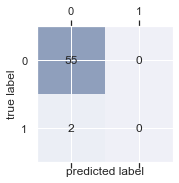

In [23]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [24]:
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       0.00      0.00      0.00         2

    accuracy                           0.96        57
   macro avg       0.48      0.50      0.49        57
weighted avg       0.93      0.96      0.95        57



c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
index_list_I = []
index_list_II = []
for i in range(len(y_test)):
    if y_test[y_test.index[i]] != y_pred[i]:
        # print(y_test.index[i])
        if y_test[y_test.index[i]] == 0:
            index_list_I.append(y_test.index[i])
        else:
            index_list_II.append(y_test.index[i])

In [26]:
# 優化
# 參考 https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.962, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.963, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.8s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [27]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [28]:
grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       0.00      0.00      0.00         2

    accuracy                           0.96        57
   macro avg       0.48      0.50      0.49        57
weighted avg       0.93      0.96      0.95        57



c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


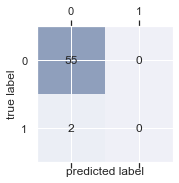

In [29]:
confmat = confusion_matrix(y_true=y_test, y_pred=grid_predictions)
confmat
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.4)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [30]:
grid_predictions.size

57

In [31]:
y_test.index

Int64Index([ 156, 1103, 1240,  991, 1527, 1693, 1145, 1426, 1312, 2094, 1417,
            1495,  808, 1866, 1274, 1519, 1568, 2155, 2427, 1424,  948,    0,
            2510, 1556, 2735, 2348, 1534,  986, 1286, 2652,  244, 2021,  950,
             891, 2264,  888, 1055, 1269,  954,  866, 2319, 1061, 1351, 1390,
             804, 1487, 2367, 1501, 1336, 1653, 1476, 1671, 2019, 1440,  124,
            1011, 1450],
           dtype='int64')

In [32]:
index_list_I = []
index_list_II = []
for i in range(len(y_test)):
    if y_test[y_test.index[i]] != grid_predictions[i]:
        # print(y_test.index[i])
        if y_test[y_test.index[i]] == 0:
            index_list_I.append(y_test.index[i])
        else:
            index_list_II.append(y_test.index[i])